In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

desired_width = 500
pd.set_option('display.width', desired_width)
pd.set_option('display.max_columns', 100)

In [ ]:
top = pd.read_csv('/content/drive/MyDrive/EDA/airbnb_top.csv')
bottom = pd.read_csv('/content/drive/MyDrive/EDA/airbnb_bottom.csv')
landmarks = pd.read_excel('/content/drive/MyDrive/EDA/Landmarks.xlsx')
airbnb_eda = pd.read_csv('/content/drive/MyDrive/EDA/airbnb_eda.csv')

In [ ]:
!pip install haversine
from haversine import haversine

def calculate_distance(data_df, landmarks_df, city):
  data_df_city = data_df.copy().loc[data_df['city']==city, :]
  landmarks_df_city = landmarks_df.copy().loc[landmarks_df['city']==city, :]

  data_latlong = data_df_city[['latitude', 'longitude']].astype('float')
  land_latlong = landmarks_df_city[['latitude', 'longitude']].astype('float')

  land_dist_list = []
  for i in data_latlong.index:
    dist_idx_list = []

    for j in land_latlong.index:
      data = data_latlong.loc[i, :]
      land = land_latlong.loc[j, :]
      # 하버 사인 거리 계산
      dist = haversine(data, land, unit='km')
      dist_idx_list.append([j, dist])

    dist_idx_list = np.array(dist_idx_list).reshape(-1, 2).T
    land_name = landmarks_df_city.loc[int(dist_idx_list[0][np.argmin(dist_idx_list[1])])]['landmark']
    distance = np.min(dist_idx_list[1])
    
    land_dist_list.append([land_name, distance])
  
  land_dist_list = np.array(land_dist_list).reshape(-1, 2)

  data_df_city['landmark'] = land_dist_list[:, 0]
  data_df_city['distance'] = land_dist_list[:, 1]
  data_df_city['distance'] = data_df_city['distance'].astype('float')
  
  print("******%s******" % city)
  print(data_df_city.head(10))
  print(data_df_city.tail(10))

  return data_df_city, landmarks_df_city

In [ ]:
# 이 셀 실행하면 5분정도 걸려요..
data_df_nyc, landmarks_NYC1 = calculate_distance(airbnb_eda, landmarks, 'NYC')
data_df_la, landmarks_LA1 = calculate_distance(airbnb_eda,landmarks, 'LA')
data_df_sf, landmarks_SF1 = calculate_distance(airbnb_eda,landmarks, 'SF')


In [ ]:
#plotly 랜드마크 plot size

import numpy as np
landmarks_NYC1['size_for_plot'] = np.repeat(3,len(landmarks_NYC1))
landmarks_LA1['size_for_plot'] = np.repeat(3,len(landmarks_LA1))
landmarks_SF1['size_for_plot'] = np.repeat(3,len(landmarks_SF1))

In [ ]:
#!pip install plotly_express
import plotly.express as px

# Top & Bottom of NYC 
fig = px.scatter_mapbox(data_df_nyc,lat='latitude',lon='longitude',color='review_scores_rating',color_continuous_scale=px.colors.cyclical.IceFire,hover_name='property_type',hover_data=['number_of_reviews','distance'],title='Top & Bottom of NYC')
fig2 = px.scatter_mapbox(landmarks_NYC1,lat='latitude',lon='longitude',hover_name='landmark', size='size_for_plot',width=100,height=100)
fig.add_trace(fig2.data[0])
fig.update_layout(mapbox_style='open-street-map', autosize=False, width=1200, height=800)
fig.show()

# Top & Bottom of LA
fig = px.scatter_mapbox(data_df_la,lat='latitude',lon='longitude',color='review_scores_rating',color_continuous_scale=px.colors.cyclical.IceFire,hover_name='property_type',hover_data=['number_of_reviews','distance'],title='Top & Bottom of LA')
fig2 = px.scatter_mapbox(landmarks_LA1,lat='latitude',lon='longitude',hover_name='landmark',size='size_for_plot')
fig.add_trace(fig2.data[0])
fig.update_layout(mapbox_style='open-street-map', autosize=False, width=1200, height=800)
fig.show()

# Top & Bottom of SF
fig = px.scatter_mapbox(data_df_sf,lat='latitude',lon='longitude',color='review_scores_rating',color_continuous_scale=px.colors.cyclical.IceFire,hover_name='property_type',hover_data=['number_of_reviews','distance'],title='Top & Bottom of SF')
fig2 = px.scatter_mapbox(landmarks_SF1,lat='latitude',lon='longitude',hover_name='landmark',size='size_for_plot')
fig.add_trace(fig2.data[0])
fig.update_layout(mapbox_style='open-street-map', autosize=False, width=1200, height=800)
fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#----------------------------------------------------------------------------------------------------------------------

In [ ]:
best = np.ones(top.shape[0])
top['group'] = best
worst = np.zeros(bottom.shape[0])
bottom['group'] = worst

In [ ]:
airbnb2 = pd.concat([top,bottom])
airbnb2[['property_type','room_type','bed_type','cancellation_policy']] = airbnb2[['property_type','room_type','bed_type','cancellation_policy']].astype('category')
airbnb2.loc[(airbnb2.property_type != 'Apartment') &(airbnb2.property_type != 'House'), 'property_type'] = 'Other'
airbnb2['description'] = airbnb2['description'].astype(str)
airbnb2['des_len'] = airbnb2.description.apply(lambda x: len(x))

## 리뷰 점수 분포 / 리뷰점수&리뷰개수 상관관계

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



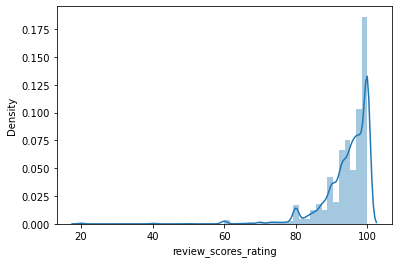

In [ ]:
sns.distplot(airbnb_eda['review_scores_rating'])

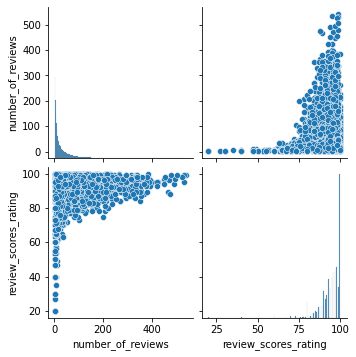

In [ ]:
sns.pairplot(airbnb_eda[['number_of_reviews','review_scores_rating']])

## Room (뚜렷한 결과 X )

###top_bottom property_type

In [ ]:
import plotly.graph_objects as go
host=['top','bottom']
fig = go.Figure(data=[
    go.Bar(name='apartment', x=host, y=[153,137]),
    go.Bar(name='house', x=host, y=[104,64]),
    go.Bar(name='other', x=host, y=[43,40])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [ ]:
print(airbnb2.loc[airbnb2['group']==1].groupby('property_type').agg({'group':'count'}))
print(airbnb2.loc[airbnb2['group']==0].groupby('property_type').agg({'group':'count'}))

###top_bottom 수용인원

In [ ]:
import plotly.graph_objects as go

import pandas as pd

df = airbnb2
fig = go.Figure()

fig.add_trace(go.Violin(x=df['group'][ df['group'] == 0 ],
                        y=df['accommodates'][ df['group'] == 0 ],
                        legendgroup='bottom', scalegroup='bottom', name='bottom',
                        line_color='blue')
             )
fig.add_trace(go.Violin(x=df['group'][ df['group'] == 1 ],
                        y=df['accommodates'][ df['group'] == 1 ],
                        legendgroup='top', scalegroup='top', name='top',
                        line_color='orange')
             )

fig.update_traces(box_visible=True, meanline_visible=True)
fig.update_layout(violinmode='group')
fig.show()

## 최상의 숙소와 최악의 숙소 가격 분포
- LA 의 경우 가격 분산이 높아 객관화 부족

###전체 가격 분포

In [ ]:
import plotly.graph_objects as go

import pandas as pd

df = airbnb2
fig = go.Figure()

fig.add_trace(go.Violin(x=df['group'][ df['group'] == 0 ],
                        y=df['log_price'][ df['group'] == 0 ],
                        legendgroup='bottom', scalegroup='bottom', name='bottom',
                        line_color='blue')
             )
fig.add_trace(go.Violin(x=df['group'][ df['group'] == 1 ],
                        y=df['log_price'][ df['group'] == 1 ],
                        legendgroup='top', scalegroup='top', name='top',
                        line_color='orange')
             )

fig.update_traces(box_visible=True, meanline_visible=True)
fig.update_layout(violinmode='group')
fig.show()

###도시별 가격 분포

In [ ]:
import plotly.graph_objects as go

import pandas as pd

df = airbnb2
fig = go.Figure()

fig.add_trace(go.Violin(x=df['city'][ df['group'] == 0 ],
                        y=df['log_price'][ df['group'] == 0 ],
                        legendgroup='bottom', scalegroup='bottom', name='bottom',
                        line_color='blue')
             )
fig.add_trace(go.Violin(x=df['city'][ df['group'] == 1 ],
                        y=df['log_price'][ df['group'] == 1 ],
                        legendgroup='top', scalegroup='top', name='top',
                        line_color='orange')
             )

fig.update_traces(box_visible=True, meanline_visible=True)
fig.update_layout(violinmode='group')
fig.show()

###Room_type 별 가격 분

In [ ]:
airbnb2[['property_type','room_type','bed_type','cancellation_policy']] = airbnb2[['property_type','room_type','bed_type','cancellation_policy']].astype('category')
airbnb2.loc[(airbnb2.property_type != 'Apartment') &(airbnb2.property_type != 'House'), 'property_type'] = 'Other'

In [ ]:
import plotly.graph_objects as go

import pandas as pd

df = airbnb2
fig = go.Figure()

fig.add_trace(go.Violin(x=df['property_type'][ df['group'] == 0 ],
                        y=df['log_price'][ df['group'] == 0 ],
                        legendgroup='bottom', scalegroup='bottom', name='bottom',
                        line_color='blue')
             )
fig.add_trace(go.Violin(x=df['property_type'][ df['group'] == 1 ],
                        y=df['log_price'][ df['group'] == 1 ],
                        legendgroup='top', scalegroup='top', name='top',
                        line_color='orange')
             )

fig.update_traces(box_visible=True, meanline_visible=True)
fig.update_layout(violinmode='group')
fig.show()

## Host ( identity_verified / description_length / response_rate / cancellation_policy )

### Host_identity_verified

In [ ]:
import plotly.graph_objects as go
host=['top','bottom']
fig = go.Figure(data=[
    go.Bar(name='verified', x=host, y=[268,32]),
    go.Bar(name='UNverified', x=host, y=[105,126])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [ ]:
#print(len(airbnb2.loc[(airbnb2.host_identity_verified == 't')&(airbnb2.group ==1)]['host_identity_verified']))
#print(len(airbnb2.loc[(airbnb2.host_identity_verified == 'f')&(airbnb2.group == 1)]['host_identity_verified']))
#print(len(airbnb2.loc[(airbnb2.host_identity_verified == 't')&(airbnb2.group == 0)]['host_identity_verified']))
#print(len(airbnb2.loc[(airbnb2.host_identity_verified == 'f')&(airbnb2.group == 0)]['host_identity_verified']))

## Host_Response_Rate

In [ ]:
#city 별 host_response_rate
import plotly.graph_objects as go

import pandas as pd

df = airbnb2
fig = go.Figure()

fig.add_trace(go.Violin(x=df['city'][ df['group'] == 0 ],
                        y=df['host_response_rate'][ df['group'] == 0 ],
                        legendgroup='bottom', scalegroup='bottom', name='bottom',
                        line_color='red')
             )
fig.add_trace(go.Violin(x=df['city'][ df['group'] == 1 ],
                        y=df['host_response_rate'][ df['group'] == 1 ],
                        legendgroup='top', scalegroup='top', name='top',
                        line_color='purple')
             )

fig.update_traces(box_visible=True, meanline_visible=True)
fig.update_layout(violinmode='group')
fig.show()

In [ ]:
# 전체 host_response_rate
import plotly.graph_objects as go

import pandas as pd

df = airbnb2
fig = go.Figure()

fig.add_trace(go.Violin(x=df['group'][df['group'] ==0],
                        y=df['host_response_rate'][ df['group'] == 0 ],
                        legendgroup='bottom', scalegroup='bottom', name='bottom',
                        line_color='grey')
             )
fig.add_trace(go.Violin(x=df['group'][df['group']==1 ],
                        y=df['host_response_rate'][ df['group'] == 1 ],
                        legendgroup='top', scalegroup='top', name='top',
                        line_color='green')
             )

fig.update_traces(box_visible=True, meanline_visible=True)
fig.update_layout(violinmode='group')
fig.show()

## Description Length = 호스트의 친절함?

In [ ]:
# 전체 host_response_rate
import plotly.graph_objects as go

import pandas as pd

df = airbnb2
fig = go.Figure()

fig.add_trace(go.Violin(x=df['group'][df['group'] ==0],
                        y=df['des_len'][ df['group'] == 0 ],
                        legendgroup='bottom', scalegroup='bottom', name='bottom',
                        line_color='blue')
             )
fig.add_trace(go.Violin(x=df['group'][df['group']==1 ],
                        y=df['des_len'][ df['group'] == 1 ],
                        legendgroup='top', scalegroup='top', name='top',
                        line_color='orange')
             )

fig.update_traces(box_visible=True, meanline_visible=True)
fig.update_layout(violinmode='group')
fig.show()

## Cancellation Policy
- top 인 숙소들은 strict 한 policy 로 예약관리가 잘 되어 있다?

In [ ]:
import plotly.graph_objects as go
host=['top','bottom']
fig = go.Figure(data=[
    go.Bar(name='flexible', x=host, y=[26,77]),
    go.Bar(name='moderate', x=host, y=[108,40]),
    go.Bar(name='strict', x=host, y=[166,112]),
    go.Bar(name='super_strict_30', x=host, y=[np.nan,1]),
    go.Bar(name='super_strict_60', x=host, y=[np.nan, 1])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [ ]:
print(top.cancellation_policy.value_counts())
print(bottom.cancellation_policy.value_counts())


strict      166
moderate    108
flexible     26
Name: cancellation_policy, dtype: int64
strict             112
flexible            77
moderate            40
super_strict_60      1
super_strict_30      1
Name: cancellation_policy, dtype: int64
